In [14]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [16]:
weight = 0.3
bias = 0.9

# Create data
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [17]:
train_split = int(0.8 * len(X))

X_train = X[:train_split]
X_test = X[train_split:]
y_train = y[:train_split]
y_test = y[train_split:]

len(X_train), len(y_train), len(X_test) , len(y_test)

(80, 80, 20, 20)

In [18]:
def data_visualisation(train_data=X_train,
                       train_labels=y_train,
                       test_data=X_test,
                       test_labels=y_test,
                       predictions=None):

  plt.figure(figsize=(10,7))

  # TRAIN
  plt.scatter(train_data,train_labels,s=4,c='b',label='Training data')

  #TEST
  plt.scatter(test_data,test_labels,s=4,c='g',label='Test data')

  if predictions is not None:
    plt.scatter(test_data,predictions,s=4,c='r',label='predictions')

  plt.legend(prop={"size": 14});

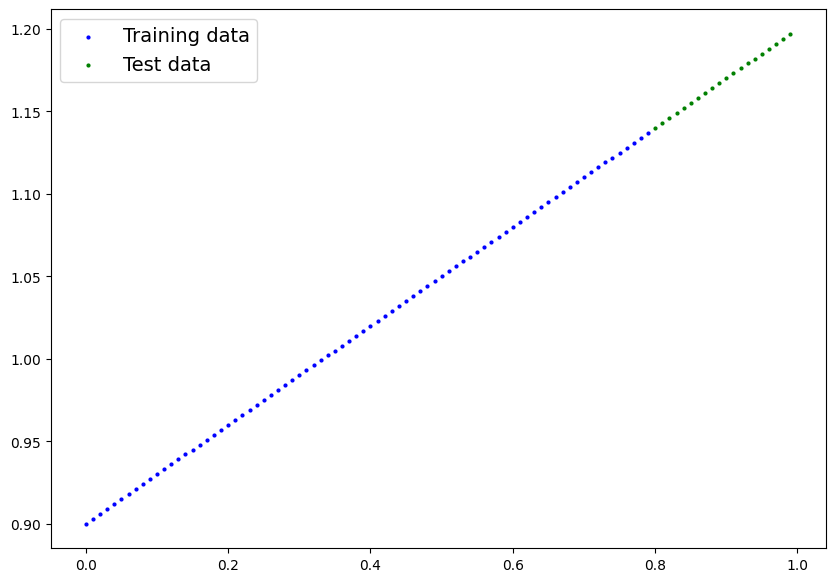

In [19]:
data_visualisation(train_data=X_train,
                   train_labels=y_train,
                   test_data=X_test,
                   test_labels=y_test)

# LINEAR REGRESSION MODELE

In [20]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1,dtype=float),
                          requires_grad=True)

    self.bias = nn.Parameter(torch.randn(1,dtype=float),
                          requires_grad=True)

  def forward(self, x :torch.Tensor)-> torch.Tensor:
    return self.weight * x + self.bias


In [21]:
torch.manual_seed(42)

model_2 = LinearRegression()

print(model_2.state_dict())

OrderedDict([('weight', tensor([0.3367], dtype=torch.float64)), ('bias', tensor([0.1288], dtype=torch.float64))])


In [22]:
next(model_2.parameters()).device

device(type='cpu')

In [23]:
model_2.to(device)
list(model_2.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

# Loss function and optimizer

In [24]:
loss_function = nn.L1Loss()

optimizer_function = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [25]:
torch.manual_seed(42)

epochs = 300

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_2.train()

    y_pred = model_2(X_train)

    loss = loss_function(y_pred, y_train)

    optimizer_function.zero_grad()

    loss.backward()

    optimizer_function.step()

    if epoch % 20 == 0:
      model_2.eval()
      with torch.inference_mode():

        y_preds = model_2(X_test)

        test_loss = loss_function(y_preds,y_test)

        print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 20 | Train loss: 0.525 | Test loss: 0.454
Epoch: 40 | Train loss: 0.294 | Test loss: 0.183
Epoch: 60 | Train loss: 0.077 | Test loss: 0.073
Epoch: 80 | Train loss: 0.053 | Test loss: 0.116
Epoch: 100 | Train loss: 0.046 | Test loss: 0.105
Epoch: 120 | Train loss: 0.039 | Test loss: 0.089
Epoch: 140 | Train loss: 0.032 | Test loss: 0.074
Epoch: 160 | Train loss: 0.025 | Test loss: 0.058
Epoch: 180 | Train loss: 0.018 | Test loss: 0.042
Epoch: 200 | Train loss: 0.011 | Test loss: 0.026
Epoch: 220 | Train loss: 0.004 | Test loss: 0.009
Epoch: 240 | Train loss: 0.004 | Test loss: 0.006
Epoch: 260 | Train loss: 0.004 | Test loss: 0.006
Epoch: 280 | Train loss: 0.004 | Test loss: 0.006


In [26]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_2.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weight', tensor([0.3067], dtype=torch.float64)), ('bias', tensor([0.9011], dtype=torch.float64))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [27]:
model_2.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_2(X_test)
y_preds

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], dtype=torch.float64)

In [28]:
y_preds.cpu()

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], dtype=torch.float64)

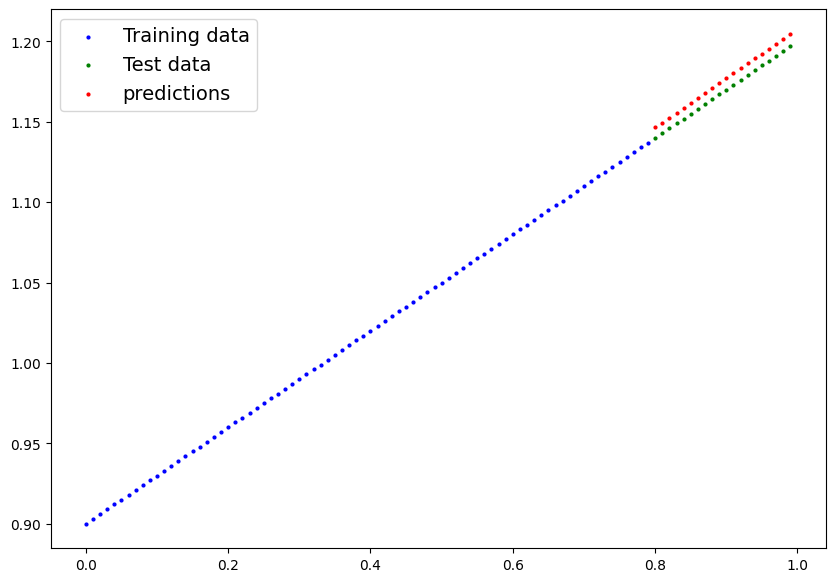

In [29]:
data_visualisation(predictions=y_preds.cpu())

In [30]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_2.pth


In [31]:
loaded_model_2 = LinearRegression()

loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_2.to(device)

print(f"Loaded model:\n{loaded_model_2}")
print(f"Model on device:\n{next(loaded_model_2.parameters()).device}")

Loaded model:
LinearRegression()
Model on device:
cpu


In [32]:
y_preds_new = loaded_model_2(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])